<a href="https://colab.research.google.com/github/anonyme56/ProjetProgrammationDiabete/blob/main/TP_Prog_indian_diabete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prédiction du Diabète - Pipeline de Data Science Complet

## Projet d'Examen - Mini Pipeline de Bout en Bout

**Auteur:** Yohan, Ilias, Chanesse, Aro  

**Date:** Janvier 2026  
**Dataset:** [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)  
**Type de problème:** Classification

---

### Objectif
Prédire si une patiente a le diabète (1) ou non (0) sur la base de mesures diagnostiques médicales.

### Plan du Notebook
1. Acquisition des données
2. Compréhension des données
3. Nettoyage & Prétraitement
4. Analyse Exploratoire des Données (EDA)
5. Modélisation (3+ modèles)
6. Explication des Modèles
7. Optimisation des Hyperparamètres
8. Évaluation & Sélection du Modèle
9. Conclusion & Reproductibilité

In [28]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [29]:
# Import des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Constante pour la reproductibilité
RANDOM_STATE = 42

print("Bibliothèques importées avec succès")
print(f"- NumPy version: {np.__version__}")
print(f"- Pandas version: {pd.__version__}")
print(f"- Matplotlib version: {plt.matplotlib.__version__}")
print(f"- Seaborn version: {sns.__version__}")

Bibliothèques importées avec succès
- NumPy version: 2.0.2
- Pandas version: 2.2.2
- Matplotlib version: 3.10.0
- Seaborn version: 0.13.2


In [30]:
# Chargement du dataset
# Le fichier CSV se trouve dans le dossier téléchargé
csv_file = os.path.join(path, 'diabetes.csv')

df = pd.read_csv(csv_file)

print(f"Dataset chargé avec succès depuis: {csv_file}")
print(f"Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes\n")

# Aperçu des premières lignes
df.head(10)

Dataset chargé avec succès depuis: /kaggle/input/pima-indians-diabetes-database/diabetes.csv
Dimensions: 768 lignes × 9 colonnes



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## 2. Compréhension des Données

### Description des Variables

Le dataset contient **8 variables explicatives** (features) et **1 variable cible** (target):

**Variables Explicatives:**
1. **Pregnancies**: Nombre de grossesses
2. **Glucose**: Concentration de glucose plasmatique à 2 heures dans un test de tolérance au glucose oral
3. **BloodPressure**: Pression artérielle diastolique (mm Hg)
4. **SkinThickness**: Épaisseur du pli cutané du triceps (mm)
5. **Insulin**: Insuline sérique à 2 heures (mu U/ml)
6. **BMI**: Indice de masse corporelle (poids en kg/(taille en m)^2)
7. **DiabetesPedigreeFunction**: Fonction de pedigree du diabète (probabilité de diabète basée sur les antécédents familiaux)
8. **Age**: Âge (années)

**Variable Cible:**
- **Outcome**: 0 = Pas de diabète, 1 = Diabète

In [31]:
# Informations générales sur le dataset
print("="*80)
print("INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("="*80)
df.info()

print("\n" + "="*80)
print("STATISTIQUES DESCRIPTIVES")
print("="*80)
display(df.describe().T.round(2))

print("\n" + "="*80)
print("TYPES DE DONNÉES")
print("="*80)
print(df.dtypes)

INFORMATIONS GÉNÉRALES SUR LE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

STATISTIQUES DESCRIPTIVES


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00



TYPES DE DONNÉES
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [32]:
# Analyse des valeurs manquantes
print("="*80)
print("ANALYSE DES VALEURS MANQUANTES")
print("="*80)

missing_data = pd.DataFrame({
    'Colonne': df.columns,
    'Valeurs_Manquantes': df.isnull().sum(),
    'Pourcentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print(missing_data)
print(f"\n✓ Aucune valeur manquante détectée explicitement (NaN)")

# Cependant, vérification des valeurs impossibles (0 pour certaines variables)
print("\n" + "="*80)
print("DÉTECTION DES VALEURS IMPOSSIBLES (0 pour variables biologiques)")
print("="*80)

# Ces variables ne peuvent pas physiologiquement être à 0
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df) * 100)
    print(f"{col:20} : {zero_count:3} valeurs à 0 ({zero_pct:.2f}%)")

print("\n Ces 0 sont probablement des valeurs manquantes non étiquetées!")

ANALYSE DES VALEURS MANQUANTES
                                           Colonne  Valeurs_Manquantes  \
Pregnancies                            Pregnancies                   0   
Glucose                                    Glucose                   0   
BloodPressure                        BloodPressure                   0   
SkinThickness                        SkinThickness                   0   
Insulin                                    Insulin                   0   
BMI                                            BMI                   0   
DiabetesPedigreeFunction  DiabetesPedigreeFunction                   0   
Age                                            Age                   0   
Outcome                                    Outcome                   0   

                          Pourcentage  
Pregnancies                       0.0  
Glucose                           0.0  
BloodPressure                     0.0  
SkinThickness                     0.0  
Insulin                     

DISTRIBUTION DE LA VARIABLE CIBLE (Outcome)

Classe 0 (Pas de diabète): 500 (65.10%)
Classe 1 (Diabète)       : 268 (34.90%)


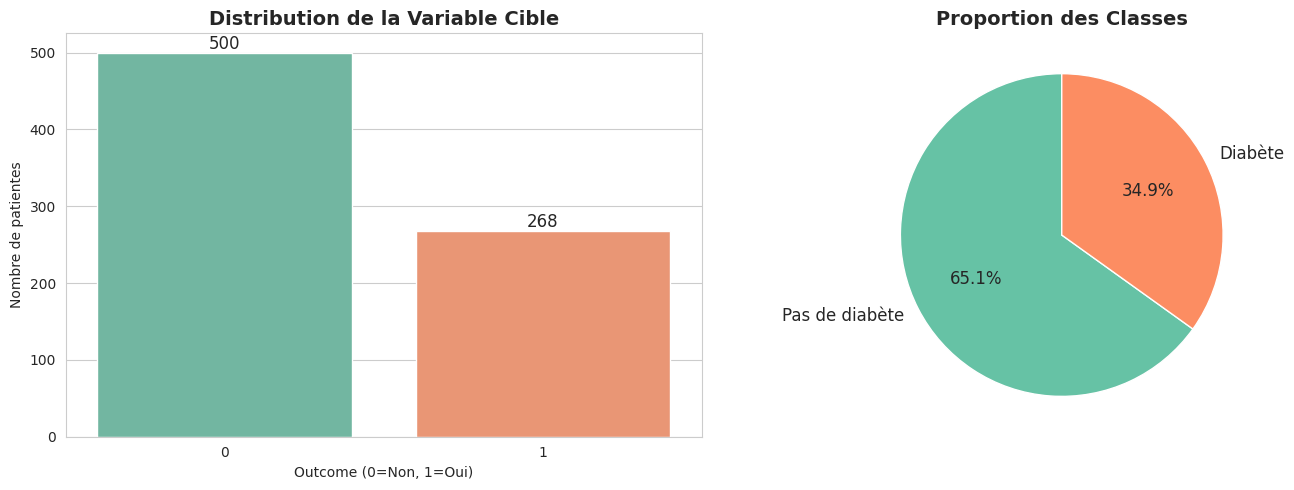


Le dataset est légèrement déséquilibré avec une classe de 65.1%  de personnes testées négatives au diabète.


In [33]:
# Distribution de la variable cible
print("="*80)
print("DISTRIBUTION DE LA VARIABLE CIBLE (Outcome)")
print("="*80)

outcome_counts = df['Outcome'].value_counts()
outcome_pct = df['Outcome'].value_counts(normalize=True) * 100

print(f"\nClasse 0 (Pas de diabète): {outcome_counts[0]} ({outcome_pct[0]:.2f}%)")
print(f"Classe 1 (Diabète)       : {outcome_counts[1]} ({outcome_pct[1]:.2f}%)")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Graphique à barres
sns.countplot(data=df, x='Outcome', palette='Set2', ax=axes[0])
axes[0].set_title('Distribution de la Variable Cible', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Outcome (0=Non, 1=Oui)')
axes[0].set_ylabel('Nombre de patientes')
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)

# Graphique circulaire
colors = sns.color_palette('Set2')
axes[1].pie(outcome_counts, labels=['Pas de diabète', 'Diabète'], autopct='%1.1f%%',
           startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Proportion des Classes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nLe dataset est légèrement déséquilibré avec une classe de {outcome_pct[0]:.1f}%  de personnes testées négatives au diabète.")

## 3. Nettoyage & Prétraitement

### Stratégie de Nettoyage

**1. Gestion des valeurs impossibles (0):**
- Remplacer les 0 par NaN pour: `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`
- Justification: Ces valeurs ne peuvent pas être physiologiquement nulles

**2. Imputation des valeurs manquantes:**
- Utiliser la **médiane** (robuste aux outliers)
- L'imputation sera faite **APRÈS** le split train/test pour éviter le data leakage
- Utilisation d'un pipeline sklearn pour assurer la reproductibilité

**3. Gestion des outliers:**
- Détection via boxplots et IQR
- Pas de suppression systématique (risque de perte d'information)
- Le scaling robuste atténuera l'impact

**4. Scaling:**
- StandardScaler pour normaliser les features
- Important car les features ont des échelles très différentes

In [34]:
# Création d'une copie pour le nettoyage
df_clean = df.copy()

# Remplacer les 0 par NaN pour les variables qui ne peuvent pas être nulles
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("="*80)
print("REMPLACEMENT DES VALEURS IMPOSSIBLES (0) PAR NaN")
print("="*80)

for col in cols_to_replace:
    before = (df_clean[col] == 0).sum()
    df_clean[col] = df_clean[col].replace(0, np.nan)
    after = df_clean[col].isnull().sum()
    print(f"{col:20} : {before} zéros remplacés : {after} NaN")

print("\nRemplacement effectué avec succès")

REMPLACEMENT DES VALEURS IMPOSSIBLES (0) PAR NaN
Glucose              : 5 zéros remplacés : 5 NaN
BloodPressure        : 35 zéros remplacés : 35 NaN
SkinThickness        : 227 zéros remplacés : 227 NaN
Insulin              : 374 zéros remplacés : 374 NaN
BMI                  : 11 zéros remplacés : 11 NaN

Remplacement effectué avec succès


VALEURS MANQUANTES APRÈS NETTOYAGE
                     Colonne  Valeurs_Manquantes  Pourcentage
Insulin              Insulin                 374        48.70
SkinThickness  SkinThickness                 227        29.56
BloodPressure  BloodPressure                  35         4.56
BMI                      BMI                  11         1.43
Glucose              Glucose                   5         0.65


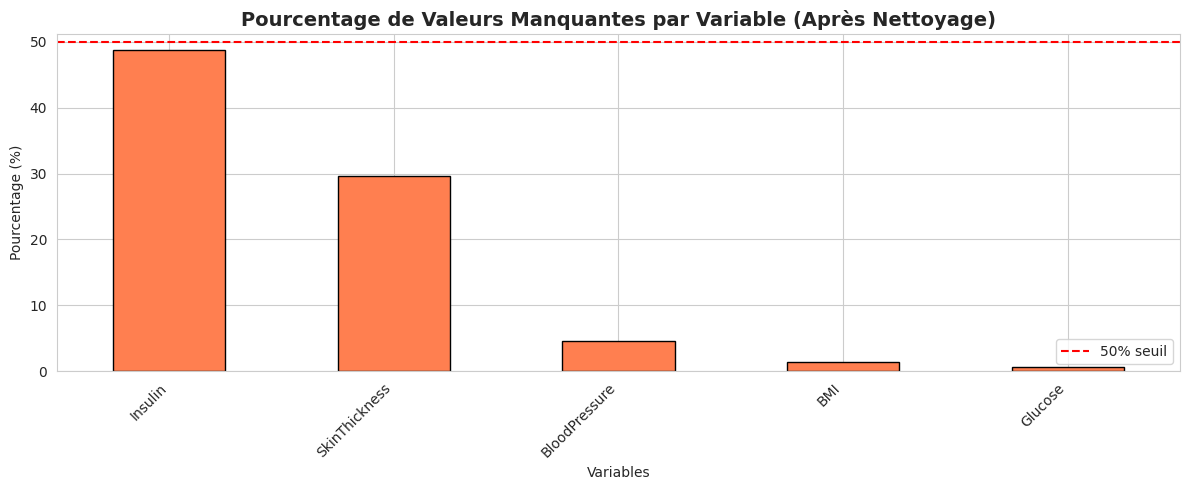


L'insuline a 48.7% de valeurs manquantes - forte proportion!


In [35]:
# Visualisation des valeurs manquantes après nettoyage
missing_cleaned = df_clean.isnull().sum()
missing_pct_cleaned = (missing_cleaned / len(df_clean) * 100).round(2)

missing_df = pd.DataFrame({
    'Colonne': df_clean.columns,
    'Valeurs_Manquantes': missing_cleaned,
    'Pourcentage': missing_pct_cleaned
})

print("="*80)
print("VALEURS MANQUANTES APRÈS NETTOYAGE")
print("="*80)
print(missing_df[missing_df['Valeurs_Manquantes'] > 0].sort_values('Valeurs_Manquantes', ascending=False))

# Visualisation
plt.figure(figsize=(12, 5))
missing_to_plot = missing_pct_cleaned[missing_pct_cleaned > 0].sort_values(ascending=False)
missing_to_plot.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Pourcentage de Valeurs Manquantes par Variable (Après Nettoyage)',
          fontsize=14, fontweight='bold')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=50, color='red', linestyle='--', label='50% seuil')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\nL'insuline a {missing_pct_cleaned['Insulin']:.1f}% de valeurs manquantes - forte proportion!")